## Chi-Quadrat-Test auf Anpassungsgüte
----------------------------------------

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import sample
#from scipy.stats import t
#from scipy.stats import chi2
#from scipy import stats
import scipy.stats
#import statsmodels.api as smi
#import pylab

%run ../src/notebook_env.py


---------------------------------
Working on the host: LAPTOP-9LETB4SJ

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Mar  8 2022, 15:52:24) [MSC v.1929 64 bit (AMD64)]

---------------------------------
Python interpreter: C:\Users\zak\anaconda3\envs\srh\python.exe


Der **$\chi^2$ Anpassungsgütetest** wird angewandt, um Hypothesentests über die Verteilung einer qualitativen (kategorialen) Variable oder einer diskreten quantitativen Variable, die nur endlich viele mögliche Werte hat, durchzuführen.

Die grundlegende Logik des χ2 Anpassungsgütetests besteht darin, die Häufigkeiten von zwei Variablen zu vergleichen. Wir vergleichen die **beobachteten Häufigkeiten** einer Stichprobe mit den **erwarteten Häufigkeiten**.

Betrachten wir ein einfaches Beispiel:

Am $22$. September $2013$ fand in Deutschland die <a href="https://de.wikipedia.org/wiki/Bundestagswahl_2013">Bundestagswahl $2013$</a> statt. Mehr als $44$ Millionen Menschen gingen zur Wahl. $41,5 \%$ der deutschen Wähler entschieden sich für die Christlich Demokratische Union (CDU) und $25,7 \%$ für die Sozialdemokratische Partei (SPD). Der Einfachheit halber fassen wir den verbleibenden Prozentsatz der Stimmen ($32,8 \%$) als Sonstige zusammen.

Auf der Grundlage dieser Daten können wir eine Häufigkeitstabelle erstellen.

\begin{array}{|l|c|}
\hline
\ \text{Partei}  & \text{Prozent} & \text{relative Häufigkeit}\\
\hline
\ \text{CDU}  & 41.5 & 0.415 \\
\ \text{SPD}  & 25.7 & 0.257 \\
\ \text{Sonstige} & 32.8 & 0.328 \\
\hline 
\  & 100 & 1 \\
\hline 
\end{array}

Die dritte Spalte der obigen Tabelle entspricht den **relativen Häufigkeiten** in der deutschen Bevölkerung/Wählerschaft. Für diese Übung nehmen wir eine Zufallsstichprobe. Wir befragen 123 Studierende der FU Berlin nach ihrer Parteizugehörigkeit und halten die folgenden Antworten fest.

In [30]:
sample = ["SPD","CDU","Sonstige","CDU","CDU","CDU","CDU","CDU","CDU","SPD","CDU","Sonstige","SPD","CDU","SPD","Sonstige","CDU","Sonstige","CDU","CDU","Sonstige","Sonstige","SPD","CDU","CDU","CDU","Sonstige","CDU","CDU","CDU","Sonstige","CDU","CDU","SPD","Sonstige","CDU","CDU","CDU","CDU","SPD","CDU","Sonstige","CDU","CDU","Sonstige","SPD","Sonstige","CDU","SPD","SPD","Sonstige","SPD","Sonstige","Sonstige","SPD","SPD","CDU","Sonstige","Sonstige","Sonstige","CDU","CDU","CDU","SPD","Sonstige","SPD","Sonstige","Sonstige","CDU","SPD","CDU","SPD","Sonstige","CDU","Sonstige","CDU","Sonstige","CDU","Sonstige","SPD","CDU","CDU","Sonstige","Sonstige","CDU","Sonstige","Sonstige","SPD","CDU","Sonstige","CDU", "Sonstige","CDU","CDU","CDU","CDU","SPD","SPD","Sonstige","Sonstige","SPD","CDU","Sonstige","CDU","Sonstige","Sonstige","SPD","SPD","CDU","Sonstige","CDU","CDU","SPD","CDU","Sonstige","CDU","CDU","CDU","CDU","CDU","Sonstige","Sonstige","SPD"]
print(sample)

['SPD', 'CDU', 'Sonstige', 'CDU', 'CDU', 'CDU', 'CDU', 'CDU', 'CDU', 'SPD', 'CDU', 'Sonstige', 'SPD', 'CDU', 'SPD', 'Sonstige', 'CDU', 'Sonstige', 'CDU', 'CDU', 'Sonstige', 'Sonstige', 'SPD', 'CDU', 'CDU', 'CDU', 'Sonstige', 'CDU', 'CDU', 'CDU', 'Sonstige', 'CDU', 'CDU', 'SPD', 'Sonstige', 'CDU', 'CDU', 'CDU', 'CDU', 'SPD', 'CDU', 'Sonstige', 'CDU', 'CDU', 'Sonstige', 'SPD', 'Sonstige', 'CDU', 'SPD', 'SPD', 'Sonstige', 'SPD', 'Sonstige', 'Sonstige', 'SPD', 'SPD', 'CDU', 'Sonstige', 'Sonstige', 'Sonstige', 'CDU', 'CDU', 'CDU', 'SPD', 'Sonstige', 'SPD', 'Sonstige', 'Sonstige', 'CDU', 'SPD', 'CDU', 'SPD', 'Sonstige', 'CDU', 'Sonstige', 'CDU', 'Sonstige', 'CDU', 'Sonstige', 'SPD', 'CDU', 'CDU', 'Sonstige', 'Sonstige', 'CDU', 'Sonstige', 'Sonstige', 'SPD', 'CDU', 'Sonstige', 'CDU', 'Sonstige', 'CDU', 'CDU', 'CDU', 'CDU', 'SPD', 'SPD', 'Sonstige', 'Sonstige', 'SPD', 'CDU', 'Sonstige', 'CDU', 'Sonstige', 'Sonstige', 'SPD', 'SPD', 'CDU', 'Sonstige', 'CDU', 'CDU', 'SPD', 'CDU', 'Sonstige', 'CDU

Im nächsten Schritt zählen wir das Auftreten der einzelnen Kategorien (Parteien) in unserer Stichprobe. Diese Größen sind die **beobachteten Häufigkeiten**.

In [31]:
print ([ f"{l}: {sample.count(l)}" for l in set(sample)])

['Sonstige: 40', 'CDU: 57', 'SPD: 26']


Im nächsten Schritt berechnen wir die **erwartete Häufigkeit** ($E$) für jede Kategorie.

$$E = n \times p\text{,}$$

wobei $n$ der Stichprobenumfang und $p$ die entsprechende relative Häufigkeit aus der obigen Tabelle ist.

$$E_{CDU} = n\times p = 123 \times 0,415 = 51,045$$

$$E_{SPD} = n\times p = 123 \times 0,257 = 31,611$$

$$E_{Sonstige} = n\times p = 123 \times 0,382 = 46,986$$

Beachten Sie, dass es sich zwar um einzelne Zählungen handelt, die durch ganzzahlige Werte dargestellt werden, die **erwartete Häufigkeit**, $E$ eine Fließkommazahl ist. Das ist in Ordnung.

Nun werden die **beobachteten Häufigkeiten** und die **erwarteten Häufigkeiten** in einer Tabelle zusammengeführt.

\begin{array}{|l|c|}
\hline
\ \text{Partei}  & \text{beobachtete Häufigkeit} & \text{erwartete Häufigkeit}\\
\hline
\ \text{CDU}  & 57 & 51,045 \\
\ \text{SPD}  & 26 & 31,611 \\
\ \text{Sonstige} & 40 & 46,986 \\
\hline 
\  & 123 & 129,642 \\
\hline 
\end{array}

Großartig! Sobald wir die erwarteten Häufigkeiten kennen, müssen wir auf zwei Annahmen prüfen. Erstens müssen wir sicherstellen, dass alle erwarteten Häufigkeiten $1$ oder größer sind, und zweitens, dass höchstens $20 \%$ der erwarteten Häufigkeiten kleiner als $5$ sind. Durch einen Blick auf die Tabelle können wir bestätigen, dass beide Annahmen erfüllt sind.

Jetzt haben wir alle Zutaten, die wir brauchen, außer der Teststatistik, um einen $\chi^2$ Anpassungsgütetest durchzuführen.

Die $\chi^2$ Teststatistik für die Anpassungsgüte ist gegeben durch

$$\chi^2=\sum \frac{(O-E)^2}{E}\text{,}$$

wobei $O$ den beobachteten Häufigkeiten und $E$ den erwarteten Häufigkeiten entspricht. Die Teststatistik $\chi^2$ approximiert eine *Chi-Quadrat*-Verteilung, wenn die Nullhypothese wahr ist. Die Zahl der Freiheitsgrade ist um $1$ kleiner als die Zahl der möglichen Werte (Kategorien) für die betrachtete Variable.

$$df = c-1$$

Ausgehend von den in der obigen Tabelle angegebenen beobachteten und erwarteten Häufigkeiten lässt sich der $\chi^2$-Wert relativ einfach berechnen. Um das Berechnungsverfahren jedoch übersichtlicher zu gestalten, haben wir alle erforderlichen Berechnungsschritte in einer Tabelle zusammengefasst.

\begin{array}{|l|c|}
\hline
\ \text{Partei}  & \text{beobachtete} & \text{erwartete} & \text{Differenz} & \text{Quadrat der Differenz} & \chi^2\text{Zwischensumme}\\
\ & \text{Häufigkeit} & \text{Häufigkeit} & O-E & (O-E)^2 & (O-E)^2/E\\
\hline
\ \text{CDU}  & 57 & 51,045 & 5,955 & 35,462025 & 0,6947208\\
\ \text{SPD}  & 26 & 31,611 & -5,611 & 31,483321 & 0,9959609\\
\ \text{Sonstige} & 26 & 46,986 & -6,986 & 48,804196 & 1,0386965\\
\hline 
\  & 123 & 129,642 & -6,642 & & 2,7293783\\
\hline 
\end{array}

In unserem Beispiel ergibt die $\chi^2$-Teststatistik für die Anpassungsgüte den Wert

$$\chi^2=\sum \frac{(O-E)^2}{E} \approx2,729$$

Wenn die Nullhypothese wahr ist, sind die beobachtete und die erwartete Häufigkeit ungefähr gleich. Dies führt zu einem kleinen Wert der $\chi^2$-Teststatistik und unterstützt somit $H_0$. Ist der Wert der $\chi^2$-Teststatistik jedoch groß, liefern die Daten Beweise gegen $H_0$.

### $\chi^2$ Test der Anpassungsgüte: Ein Beispiel

Um praktische Erfahrungen zu sammeln, wenden wir den $\chi^2$ Anpassungstest in einer Übung an. Dazu laden wir den `students` Datensatz. Sie können die Datei `students.csv` <a href="https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv">hier</a> herunterladen. Importieren Sie den Datensatz und geben Sie ihm einen passenden Namen.

In [5]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
students = pd.read_csv('students.csv', index_col=0)

Der `students` Datensatz besteht aus $8239$ Zeilen, von denen jede einen bestimmten Studenten repräsentiert, und $16$ Spalten, von denen jede einer Variable/einem Merkmal entspricht, das sich auf diesen bestimmten Studenten bezieht. Diese selbsterklärenden Variablen sind: *stud.id, name, gender, age, height, weight, religion, nc.score, semester, major, minor, score1, score2, online.tutorial, graduated, salary.*

Es sei daran erinnert, dass $\chi^2$-Anpassungstests für qualitative (kategoriale) Variablen oder diskrete quantitative Variablen angewendet werden. Der `students` Datensatz enthält mehrere kategoriale Variablen, wie z. B. `gender`, `religion`, `major`, `minor` und `graduated`.

Um den $\chi^2$-Test der Anpassungsgüte zu veranschaulichen, untersuchen wir, ob die Religion unter den Studierenden gleichmäßig verteilt ist, verglichen mit der Verteilung der Religion in der Bevölkerung der Europäischen Union. Die Daten auf kontinentaler Ebene stammen aus dem Bericht "Discrimination in the EU in $2012$" (<a href="https://europa.eu/eurobarometer/api/archives/ebs/ebs_393_en.pdf">European Union: European Commission, Special Eurobarometer, $393$, p. $233$</a>). Der Bericht enthält Daten für $8$ Kategorien: $48 \%$ der Menschen werden als Katholiken, $16 \%$ als Nichtgläubige/Agnostiker, $12 \%$ als Protestanten, $8 \%$ als Orthodoxe, $7 \%$ als Atheisten, $4 \%$ als sonstige Christen, $3 \%$ als sonstige Religion/keine Angabe und $2 \%$ als Muslime eingestuft. Zum besseren Verständnis stellen wir die Daten in Form eines Tortendiagramms dar.

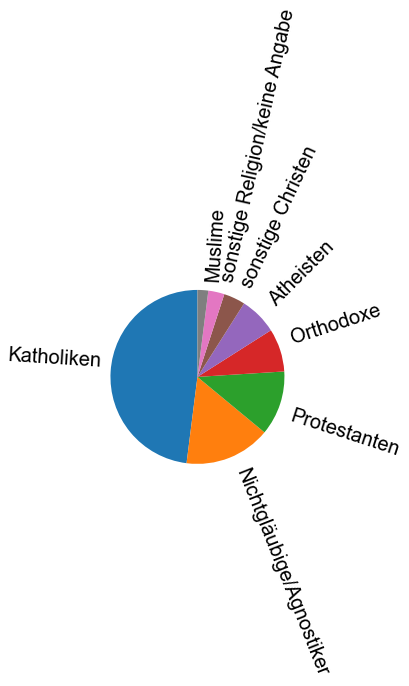

In [6]:
# Erzeuge Pie chart
y = np.array([48, 16, 12, 8, 7, 4, 3, 2])
mylabels = ["Katholiken", "Nichtgläubige/Agnostiker", "Protestanten", "Orthodoxe", "Atheisten", "sonstige Christen", "sonstige Religion/keine Angabe", "Muslime"]

plt.pie(y, labels = mylabels, startangle = 90,labeldistance=1.1,rotatelabels=True)
plt.show() 

### Vorbereitung der Daten

Wir beginnen mit der Datenexploration und der Datenaufbereitung.

Zunächst wollen wir wissen, welche Kategorien im Datensatz vorhanden sind. Dazu wenden wir die Funktion `unique()` an, die die einzelnen Spaltennamen (Kategorien) ausgibt.

In [7]:
students['religion'].unique()

array(['Muslim', 'Other', 'Protestant', 'Catholic', 'Orthodox'],
      dtype=object)

Offensichtlich gibt es in den *Studenten*daten $5$ weniger Kategorien, im Vergleich zu den $8$ Kategorien, die im EU-Bericht angegeben sind. Um Vergleiche anstellen zu können, kodieren wir die Kategorien der Religionsvariable um, um schließlich $5$ Kategorien zu erhalten: "Katholisch", "Muslimisch", "Orthodox", "Protestantisch" und "Sonstige". Achten Sie bei diesem Schritt darauf, dass Sie die Kategorien nicht verwechseln!

In [20]:
# Lege Kategorien zusammen
data_raw = [(16+ 7+ 4+ 3)/100, 48/100, 12/100, 8/100, 2/100]

data = [('Sonstige', data_raw[0]), ('Katholisch', data_raw[1]), ('Protestant', data_raw[2]), ('Orthodox', data_raw[3]), ('Muslim', data_raw[4])]

data = pd.DataFrame(data, columns=['Religion', 'relative Häufigkeit'])
data

,Religion,relative Häufigkeit
0,Sonstige,0.30
1,Katholisch,0.48
2,Protestant,0.12
3,Orthodox,0.08
4,Muslim,0.02


Nun nehmen wir eine Zufallsstichprobe. Wir wählen $256$ Studenten nach dem Zufallsprinzip aus und zählen mit der Funktion `value_counts()` die Anzahl der Studenten in jeder bestimmten Kategorie der Variablen `religion`. Wir erinnern uns, dass diese Menge den **beobachteten Häufigkeiten** entspricht.

In [21]:
students_sample= students['religion'].sample(256, random_state=1)
O_frequencies=students_sample.value_counts()
O_frequencies

Other         85
Catholic      77
Protestant    60
Orthodox      27
Muslim         7
Name: religion, dtype: int64

Mit einer einzigen Code-Zeile fügen wir die beobachteten Häufigkeiten in `data` ein, den `dataframe`, den wir oben konstruiert haben.

In [22]:
data['beobachtete Häufigkeit']=list(O_frequencies)
data

,Religion,relative Häufigkeit,beobachtete Häufigkeit
0,Sonstige,0.30,85
1,Katholisch,0.48,77
2,Protestant,0.12,60
3,Orthodox,0.08,27
4,Muslim,0.02,7


Im nächsten Schritt berechnen wir die erwarteten Häufigkeiten. Erinnern Sie sich an die Gleichung:

$$E = n \times p$$

Wir fügen die erwarteten Häufigkeiten als neue Spalte in `data` ein.

In [23]:
data['erwartete Häufigkeit']=data['relative Häufigkeit']*256
data

,Religion,relative Häufigkeit,beobachtete Häufigkeit,erwartete Häufigkeit
0,Sonstige,0.30,85,76.80
1,Katholisch,0.48,77,122.88
2,Protestant,0.12,60,30.72
3,Orthodox,0.08,27,20.48
4,Muslim,0.02,7,5.12


Sobald wir die erwarteten Häufigkeiten kennen, müssen wir zwei Annahmen überprüfen. Erstens müssen wir sicherstellen, dass alle erwarteten Häufigkeiten $1$ oder größer sind, und zweitens, dass höchstens $20 \%$ der erwarteten Häufigkeiten kleiner als $5$ sind. Durch einen Blick auf die Tabelle können wir bestätigen, dass beide Annahmen erfüllt sind.

Perfekt, jetzt sind wir fertig! Der Datensatz ist bereit für die Analyse mit dem $\chi^2$ Anpassungstest zu analysieren. Erinnern Sie sich an die Frage, an der wir interessiert sind: **Ist die Religion unter den Studierenden gleichmäßig verteilt, verglichen mit der Verteilung der Religion in der Bevölkerung der Europäischen Union?**

### Überprüfung der Hypothesen

Zur Durchführung des $\chi^2$ Anpassungstests folgen wir dem schrittweisen Durchführungsverfahren für Hypothesentests. Der $\chi^2$ Anpassungstest folgt demselben schrittweisen Verfahren wie Hypothesentests für den Grundgesamtheitsmittelwert.

$$
\begin{array}{l}
\hline
\ \text{Schritt 1}  & \text{Geben Sie die Nullhypothese } H_0 \text{ und alternative Hypothese } H_A \text{ an.}\\
\ \text{Schritt 2}  & \text{Legen Sie das Signifikanzniveau, } \alpha\text{ fest.} \\
\ \text{Schritt 3}  & \text{Berechnen Sie den Wert der Teststatistik.} \\
\ \text{Schritt 4} &\text{Bestimmen Sie den p-Wert.} \\
\ \text{Schritt 5} & \text{Wenn} \ p \le \alpha \text{, } H_0 \text{ ablehnen } \text{; ansonsten } H_0 \text{ nicht ablehnen} \text{.} \\
\ \text{Schritt 6} &\text{Interpretieren Sie das Ergebnis des Hypothesentests.} \\
\hline 
\end{array}
$$

**Schritt 1 : Geben Sie die Nullhypothese $H_0$ und alternative Hypothese $H_A$ an**

Die Nullhypothese besagt, dass die Religion unter den Studenten gleich verteilt ist, verglichen mit der Verteilung der Religion in der Bevölkerung der Europäischen Union.

$H_0:\text{Die Variable hat die angegebene Verteilung}$

**Alternative Hypothese**

$H_A:\text{Die Variable hat nicht die angegebene Verteilung}$

**Schritt 2: Legen Sie das Signifikanzniveau,$\alpha$ fest**

$$\alpha = 0,01$$

In [24]:
alpha = 0.01

**Schritt 3 und 4: Berechnen Sie den Wert der Teststatistik und den $p$-Wert**

Zur Veranschaulichung berechnen wir die Teststatistik manuell in Python. Erinnern Sie sich an die Gleichung für die Teststatistik von oben:

$$\chi^2=\sum \frac{(O-E)^2}{E}$$

In [25]:
# Berechne Teststatistik
x2 = sum((data['beobachtete Häufigkeit'] - data['erwartete Häufigkeit'])**2 / data['erwartete Häufigkeit'])
x2

48.679361979166664

Der numerische Wert der Teststatistik beträgt $\approx 48,67936$.

Um den $p$-Wert zu berechnen, verwenden wir die Funktion `chi2.cdf()`. Erinnern Sie sich daran, wie man die Freiheitsgrade berechnet:

$$df = (c - 1)$$

In [27]:
# Berechne df
df = len(data)-1

# Berechne p-Wert
p = chi2.sf(x2, df = df)
p

6.811017529549072e-10

**Schritt 5: Wenn $p \le \alpha , H_0$ ablehnen; ansonsten $H_0$ nicht ablehnen**

In [28]:
p <= alpha

True

Der $p$-Wert ist kleiner als das angegebene Signifikanzniveau von $0,01$; wir verwerfen $H_0$. Die Testergebnisse sind statistisch signifikant auf dem $1 \%$-Niveau und liefern einen sehr starken Beweis gegen die Nullhypothese.

**Schritt 6: Interpretieren Sie das Ergebnis des Hypothesentests**

$p=6,8110175 \cdot 10^{-10}$. Bei einem Signifikanzniveau von $1 \%$ lassen die Daten den Schluss zu, dass die Religionsverteilung unter den Studenten von der Religionsverteilung der Bevölkerung der Europäischen Union abweicht.

### Hypothesentests in Python

Wir haben gerade einen $\chi^2$ Anpassungstest in Python manuell durchgeführt. Sehr cool, aber jetzt wiederholen wir dieses Beispiel und nutzen die Python-Maschinerie, um das gleiche Ergebnis wie oben mit nur einer Zeile Code zu erhalten!

Für die Durchführung eines $\chi^2$ Anpassungsgüte-Test in Python durchzuführen, verwenden wir die Funktion `chisquare()`. Wir geben zwei Vektoren als Daten ein: `data['beobachtete Häufigkeit']` und `data['erwartete Häufigkeit']`.

In [108]:
# Führe Chi-Square Goodness of Fit Test durch
stats.chisquare(f_obs=data['beobachtete Häufigkeit'], f_exp=data['erwartete Häufigkeit'])

Power_divergenceResult(statistic=48.679361979166664, pvalue=6.811017529549072e-10)

Es hat gut funktioniert! Vergleichen Sie die Ausgabe der Funktion `chisquare()` mit unserem Ergebnis von oben. Auch hier können wir feststellen, dass die Daten bei einem Signifikanzniveau von $1 \%$ sehr starke Hinweise darauf liefern, dass sich die Religionsverteilung unter den Schülern von der Religionsverteilung der Bevölkerung der Europäischen Union unterscheidet.